In [89]:
import os
import argparse
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}

ticks_x = [0, 25, 50, 75, 100]
ticks_y = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hline_x = [-10,110]
interval_to_show_x = [-2,102]


df = pd.read_csv('test.csv', sep=',')
dpi = 1200

strategies = df.strategy.unique()
samples = df.samples.unique()
samples.sort()

print(f'Found following strategies : {strategies}, and following samples {samples}')

df

Found following strategies : ['random' 'n_first'], and following samples [ 25  50  75 100]


,run_id,data-name,strategy,samples,precision,recall,mAP50,mAP50-95,fitness
0,2x4snsj6,s05c024,random,75,0.976378,0.676005,0.687047,0.506354,0.524423
1,13eop5zb,s05c016,random,50,0.978462,0.913204,0.964664,0.822087,0.836345
2,215s24oo,s05c020,random,75,0.976427,0.857932,0.942832,0.752028,0.771108
3,2sgk49hw,s05c022,random,75,0.988646,0.929101,0.954692,0.849782,0.860273
4,5tgk8oqu,s05c018,n_first,75,0.995694,0.978522,0.985033,0.813524,0.830675
5,2irfvl7e,s05c022,n_first,25,0.969907,0.875402,0.939481,0.777735,0.793909
6,3766b0kg,s05c022,n_first,50,0.962338,0.925926,0.950764,0.813679,0.827387
7,1ol6m5ga,s05c024,random,25,0.979667,0.674931,0.684451,0.462630,0.484812
8,1ku2vxfv,s05c020,random,25,0.965408,0.764587,0.916825,0.698243,0.720101
9,5qhgr96i,s05c020,random,100,0.964907,0.939631,0.960303,0.765554,0.785029


In [87]:
df[['strategy', 'samples', 'precision']]

df_pivot = pd.pivot_table(df, values='precision', index='strategy', columns='samples',
                          aggfunc='mean', margins=True, margins_name='Sum')
df_pivot

samples,25,50,75,100,Sum
strategy,,,,,
n_first,0.904050,0.962154,0.958884,0.973127,0.950676
random,0.921268,0.986369,0.927211,0.947706,0.947572
Sum,0.912659,0.975362,0.943048,0.962958,0.949162


In [88]:
df_simple = df[['strategy', 'samples', 'precision']]
np.mean(df_simple.loc[(df_simple['strategy'] == 'n_first') & (df_simple['samples'] == 75)]['precision'])

0.9588840887776635

In [85]:
dfs = {}
for metric in ['precision', 'recall', 'mAP50', 'mAP50-95', 'fitness']:
    dfs[metric] = pd.pivot_table(df, values=metric, index='strategy', columns='samples',
                                    aggfunc='mean', margins=False, margins_name='mean')
    print('   ', metric)
    print(dfs[metric], end = '\n'*3)

    precision
samples        25        50        75        100
strategy                                        
n_first   0.904050  0.962154  0.958884  0.973127
random    0.921268  0.986369  0.927211  0.947706


    recall
samples        25        50        75        100
strategy                                        
n_first   0.755596  0.811435  0.809134  0.886078
random    0.768050  0.883351  0.789803  0.798279


    mAP50
samples        25        50        75        100
strategy                                        
n_first   0.810083  0.864422  0.858141  0.922218
random    0.837815  0.918402  0.843703  0.845829


    mAP50-95
samples        25        50        75        100
strategy                                        
n_first   0.613318  0.656685  0.664815  0.752913
random    0.645748  0.761025  0.674913  0.708625


    fitness
samples        25        50        75        100
strategy                                        
n_first   0.632995  0.677459  0.684147  0.769843
r

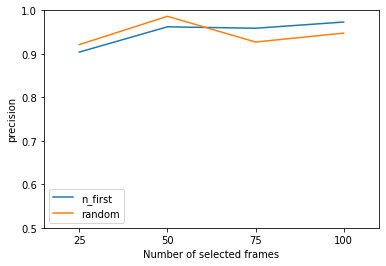

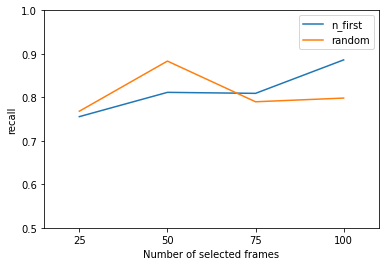

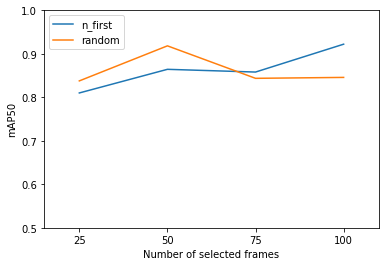

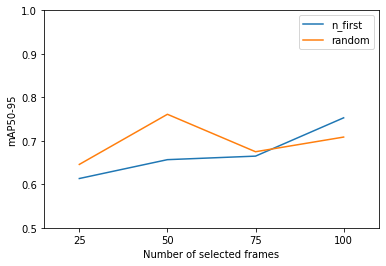

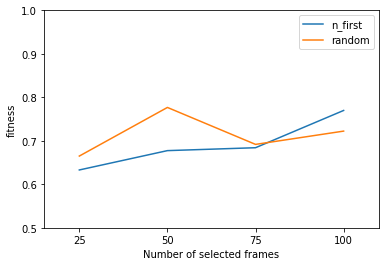

In [86]:
interval_to_show_x = [15, 110]
interval_to_show_y = [0.5, 1]

for metric, df_p in dfs.items():

    plt.plot(samples, df_p.values[0], label = df_p.index[0])
    plt.plot(samples, df_p.values[1], label = df_p.index[1])

    plt.xticks(ticks = ticks_x)
    plt.yticks(ticks = ticks_y)

    plt.xlim(interval_to_show_x)
    plt.ylim(interval_to_show_y)

    plt.xlabel('Number of selected frames')
    plt.ylabel(metric)

    plt.legend(list(df_p.index), loc = 'lower right')

    # plt.grid()

    plt.legend()
    plt.show()